## Prophet for business forecasting

In [ ]:
# Python version: Python 3.12.11

In [11]:
#!pip install prophet
# pip install scikit-learn


## Load the data

In [12]:
# The dataset is available on the same github at 
# https://github.com/dataman-git/modern-time-series/blob/main/daily-website-visitors.csv

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# If you use your local computer, use this. You will need to download the data to your local folder.
path = '/Users/chriskuo/Documents/My_documents_all/Book_neural_network_time_series_anomaly_detection/data'
data = pd.read_csv(path + '/daily-website-visitors.csv',  thousands=',')
#data['ts'] = pd.to_datetime(data['Period'], format='%d.%m.%Y', errors='coerce')
# convert string to datetime64 
data["Date"] = pd.to_datetime(data["Date"])
data = data[['First.Time.Visits','Date']]
data.columns = ['y','ds']
data['y'] = pd.to_numeric(data['y'], errors='coerce')
data = data[data['ds']>=pd.to_datetime('2017-01-01')]
data = data.sort_values(by='ds')
data

,y,ds
840,832,2017-01-01
841,1448,2017-01-02
842,1970,2017-01-03
843,2226,2017-01-04
844,2058,2017-01-05
...,...,...
2162,1373,2020-08-15
2163,1686,2020-08-16
2164,2181,2020-08-17
2165,2184,2020-08-18


In [14]:
data.dtypes

y              int64
ds    datetime64[ns]
dtype: object

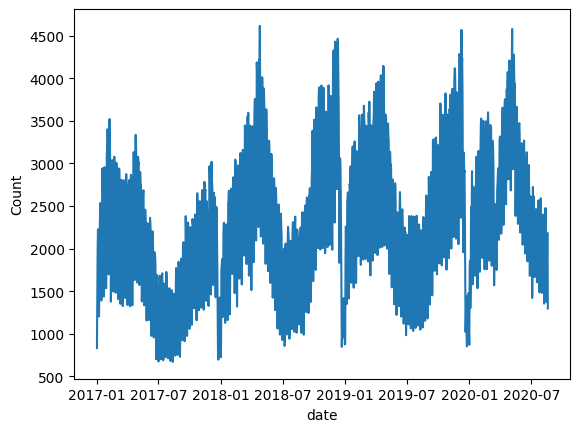

In [15]:
# create line plot of sales data
plt.plot(data['ds'], data["y"])
plt.xlabel("date")
plt.ylabel("Count")
plt.show()

### In-time and out-of-time data split

In [16]:
train_len = int(data.shape[0] * 0.85)
train = data.iloc[:train_len,:]
test = data.iloc[train_len:,:]
[train_len, len(test)]

[1127, 200]

In [17]:
train.tail()

,y,ds
1962,3148,2020-01-28
1963,3025,2020-01-29
1964,3031,2020-01-30
1965,2304,2020-01-31
1966,1728,2020-02-01


In [18]:
test.tail()

,y,ds
2162,1373,2020-08-15
2163,1686,2020-08-16
2164,2181,2020-08-17
2165,2184,2020-08-18
2166,1297,2020-08-19


## Modeling 

In [19]:
from prophet import Prophet
# Fitting with default parameters
m = Prophet()
m.add_country_holidays(country_name='US')
m.fit(train)

# Generate data points for the future period
future= m.make_future_dataframe(periods=len(test), freq='d')
future.tail()


22:01:15 - cmdstanpy - INFO - Chain [1] start processing
22:01:16 - cmdstanpy - INFO - Chain [1] done processing


,ds
1322,2020-08-15
1323,2020-08-16
1324,2020-08-17
1325,2020-08-18
1326,2020-08-19


In [20]:
# Apply the model to forecast the 20 future data points
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1322,2020-08-15,2520.448667,520.967953,1284.320205,2342.617165,2703.000940,0.0,0.0,0.0,0.0,...,-919.178791,-919.178791,-919.178791,-685.001872,-685.001872,-685.001872,0.0,0.0,0.0,916.268005
1323,2020-08-16,2520.360098,984.864311,1779.093498,2342.542050,2705.054167,0.0,0.0,0.0,0.0,...,-469.819035,-469.819035,-469.819035,-677.544571,-677.544571,-677.544571,0.0,0.0,0.0,1372.996491
1324,2020-08-17,2520.271528,1917.722786,2663.535645,2340.757548,2707.379006,0.0,0.0,0.0,0.0,...,425.117208,425.117208,425.117208,-670.074228,-670.074228,-670.074228,0.0,0.0,0.0,2275.314508
1325,2020-08-18,2520.182959,1973.595646,2720.384862,2338.996322,2709.069182,0.0,0.0,0.0,0.0,...,472.940813,472.940813,472.940813,-662.613406,-662.613406,-662.613406,0.0,0.0,0.0,2330.510366
1326,2020-08-19,2520.094389,1944.271118,2673.973079,2337.350406,2710.169557,0.0,0.0,0.0,0.0,...,435.699464,435.699464,435.699464,-655.154461,-655.154461,-655.154461,0.0,0.0,0.0,2300.639393


In [21]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas Day', 'Christmas Day_lower', 'Christmas Day_upper',
       'Columbus Day', 'Columbus Day_lower', 'Columbus Day_upper',
       'Independence Day', 'Independence Day_lower', 'Independence Day_upper',
       'Independence Day (observed)', 'Independence Day (observed)_lower',
       'Independence Day (observed)_upper', 'Labor Day', 'Labor Day_lower',
       'Labor Day_upper', 'Martin Luther King Jr. Day',
       'Martin Luther King Jr. Day_lower', 'Martin Luther King Jr. Day_upper',
       'Memorial Day', 'Memorial Day_lower', 'Memorial Day_upper',
       'New Year's Day', 'New Year's Day_lower', 'New Year's Day_upper',
       'New Year's Day (observed)', 'New Year's Day (observed)_lower',
       'New Year's Day (observed)_upper', 'Thanksgiving Day',
       'Thanksgiving Day_lower', 'Thanksgiving Day_upper', 'Veterans Day',
       'Veterans Day_lower', 'Veterans Day_upper', 'Veterans Day (obse

### Visualization

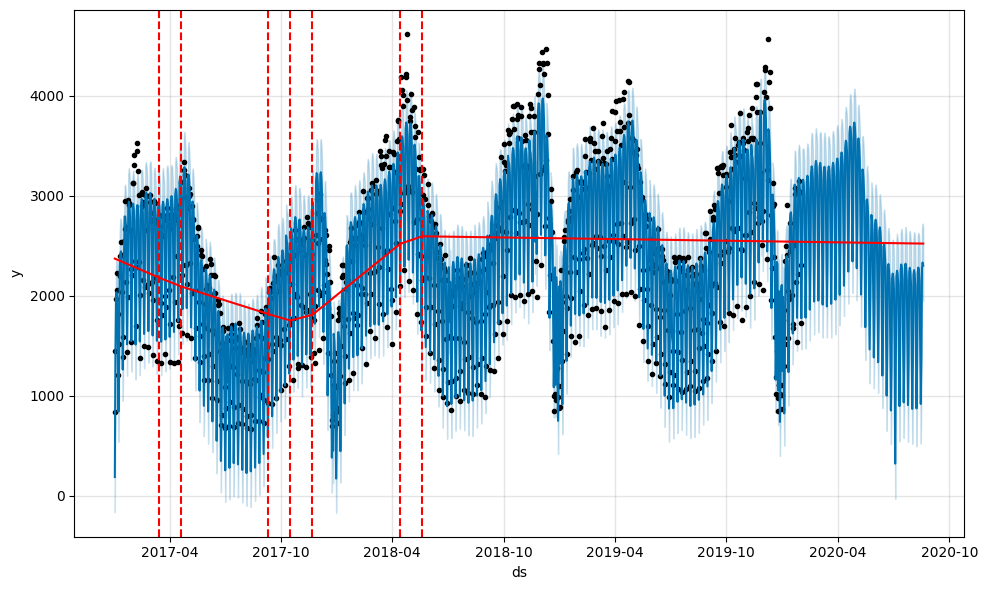

In [22]:
from prophet.plot import add_changepoints_to_plot
fig= m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Interpretation

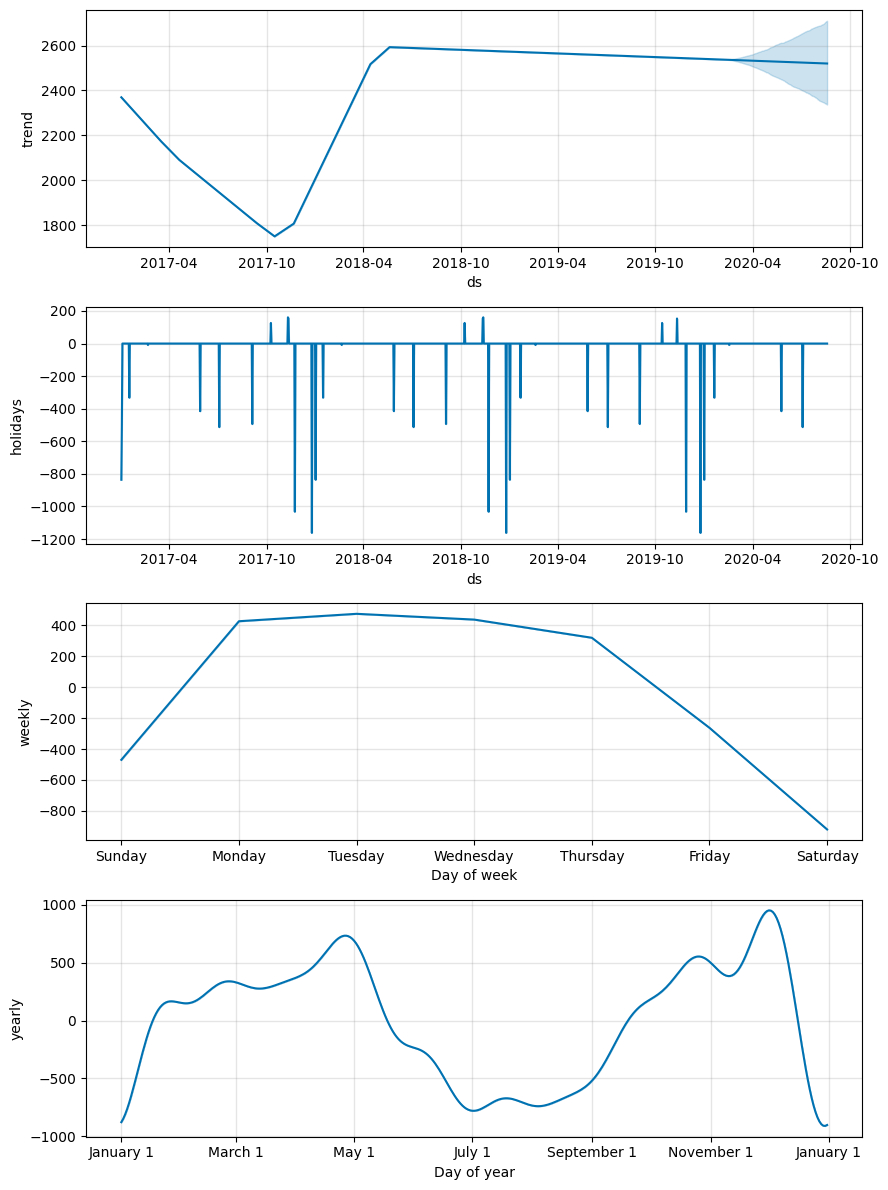

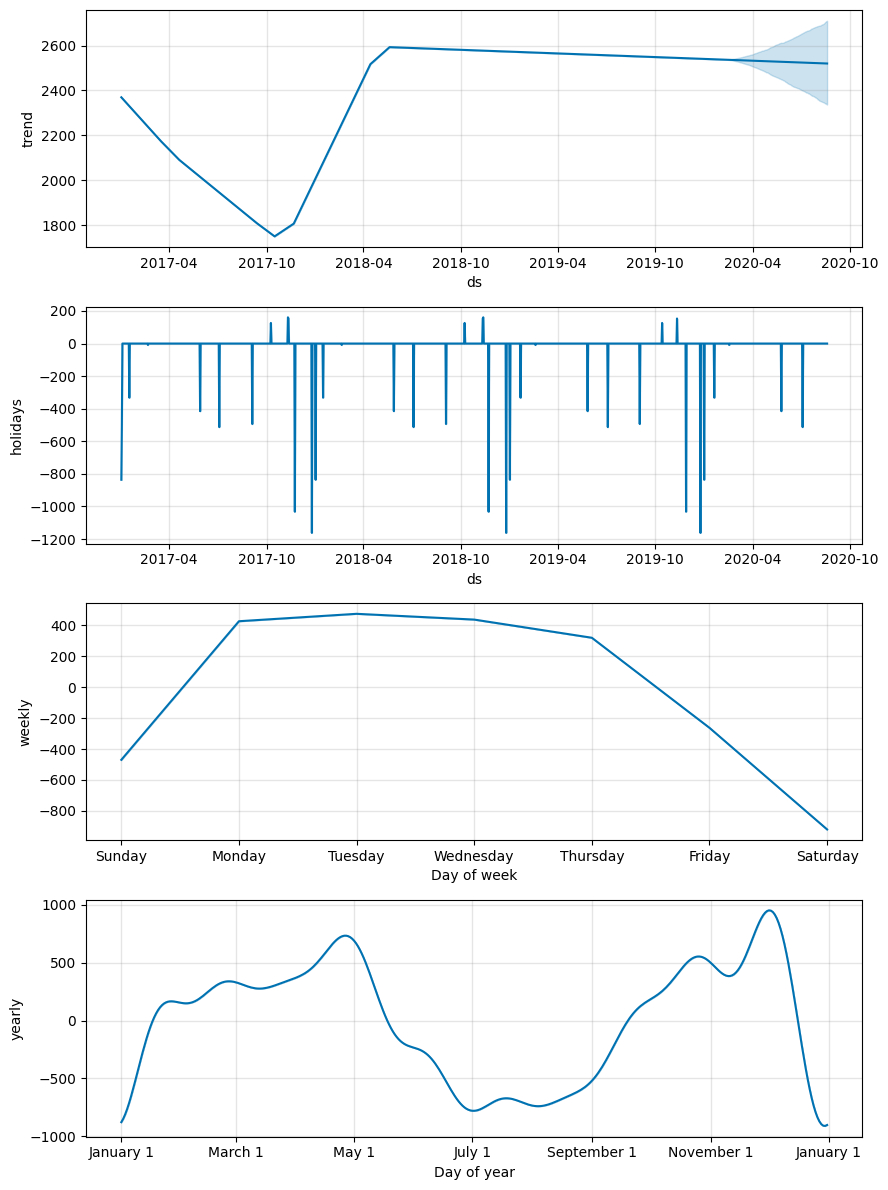

In [23]:
m.plot_components(forecast)

## Out-of-time performance

In [24]:
from sklearn import metrics
mape = metrics.mean_absolute_percentage_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))
mae = metrics.mean_absolute_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))
mse = metrics.mean_squared_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))

print(f' mape: {mape}')
print(f'mae : {mae}')
print(f'mse : {mse}')

 mape: 0.15783652705190943
mae : 397.9044808468297
mse : 239356.14747815428


## Diagnostics

In [25]:
# Diagnostics
from prophet.diagnostics import cross_validation
m_cv = cross_validation(m, 
                         initial='100 days', 
                         period='180 days', 
                         horizon = '365 days')
m_cv.head()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/4 [00:00<?, ?it/s]

22:01:24 - cmdstanpy - INFO - Chain [1] start processing
22:01:24 - cmdstanpy - INFO - Chain [1] done processing
22:01:24 - cmdstanpy - INFO - Chain [1] start processing
22:01:24 - cmdstanpy - INFO - Chain [1] done processing
22:01:24 - cmdstanpy - INFO - Chain [1] start processing
22:01:25 - cmdstanpy - INFO - Chain [1] done processing
22:01:25 - cmdstanpy - INFO - Chain [1] start processing
22:01:25 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-08-11,886.789329,717.173894,1053.174721,1121,2017-08-10
1,2017-08-12,231.228952,52.017022,413.583489,669,2017-08-10
2,2017-08-13,592.008008,420.790927,758.249507,811,2017-08-10
3,2017-08-14,1399.694972,1244.604998,1579.172030,1346,2017-08-10
4,2017-08-15,1458.780885,1278.615307,1642.298754,1471,2017-08-10


In [26]:
# Performance 
from prophet.diagnostics import performance_metrics
m_perf = performance_metrics(m_cv)
m_perf.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,198043.329717,445.020595,334.138215,0.196185,0.114916,0.258798,0.489726
1,38 days,202963.411717,450.514608,338.027100,0.195015,0.112921,0.257006,0.486301
2,39 days,204885.726250,452.643045,340.313238,0.194266,0.112921,0.255493,0.482877
3,40 days,211725.227766,460.136097,349.884955,0.197141,0.114990,0.258812,0.465753
4,41 days,219444.931480,468.449497,358.872318,0.200031,0.116555,0.261816,0.455479


In [27]:
# Diagnostics
from prophet.diagnostics import cross_validation
m_cv = cross_validation(m, 
                         initial='100 days', 
                         period='180 days', 
                         horizon = '365 days')
# Performance 
from prophet.diagnostics import performance_metrics
m_perf = performance_metrics(m_cv)
m_perf.head()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/4 [00:00<?, ?it/s]

22:01:25 - cmdstanpy - INFO - Chain [1] start processing
22:01:25 - cmdstanpy - INFO - Chain [1] done processing
22:01:25 - cmdstanpy - INFO - Chain [1] start processing
22:01:25 - cmdstanpy - INFO - Chain [1] done processing
22:01:25 - cmdstanpy - INFO - Chain [1] start processing
22:01:26 - cmdstanpy - INFO - Chain [1] done processing
22:01:26 - cmdstanpy - INFO - Chain [1] start processing
22:01:26 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,198043.329717,445.020595,334.138215,0.196185,0.114916,0.258798,0.482877
1,38 days,202963.411717,450.514608,338.027100,0.195015,0.112921,0.257006,0.479452
2,39 days,204885.726250,452.643045,340.313238,0.194266,0.112921,0.255493,0.476027
3,40 days,211725.227766,460.136097,349.884955,0.197141,0.114990,0.258812,0.458904
4,41 days,219444.931480,468.449497,358.872318,0.200031,0.116555,0.261816,0.448630


In [28]:
from sklearn import metrics
mape = metrics.mean_absolute_percentage_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))
mae = metrics.mean_absolute_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))
mse = metrics.mean_squared_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))

print(f' mape: {mape}')
print(f'mae : {mae}')
print(f'mse : {mse}')

 mape: 0.15783652705190943
mae : 397.9044808468297
mse : 239356.14747815428


## Hyper-parameters

In [29]:
changepoint_prior_scale =  [0.001, 0.1, 0.2, 0.3, 0.4, 0.5]
seasonality_prior_scale = [1, 5, 10, 15] # default 10
seasonality_model = ['additive', 'multiplicative']
results = []
iteration = 1
for sm in seasonality_model:
    for s in seasonality_prior_scale:
        for cp in changepoint_prior_scale:
            m = Prophet(
                seasonality_mode = sm, 
                seasonality_prior_scale = s,
                changepoint_prior_scale = cp,
            )
            m.add_country_holidays(country_name='US')
            model = m.fit(train)
            future = model.make_future_dataframe(periods=len(test), freq='D')
            forecast = model.predict(future) 
        
            mape = metrics.mean_absolute_percentage_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))
            mae = metrics.mean_absolute_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))
            mse = metrics.mean_squared_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))
        
            print(f'mape : {mape}')
            results.append([iteration, sm, s, cp,  mape, mae, mse])
            iteration += 1
results = pd.DataFrame(results, columns = ['iteration', 'seasonality_mode', 'seasonality_prior_scale', 'changepoint_prior_scale', 'mape', 'mae', 'mse'])

22:01:26 - cmdstanpy - INFO - Chain [1] start processing
22:01:26 - cmdstanpy - INFO - Chain [1] done processing
22:01:26 - cmdstanpy - INFO - Chain [1] start processing
22:01:27 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.12534862618724982


22:01:27 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.17595495751322612


22:01:27 - cmdstanpy - INFO - Chain [1] done processing
22:01:27 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.21259086352494427


22:01:28 - cmdstanpy - INFO - Chain [1] done processing
22:01:28 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.19969854999842362


22:01:28 - cmdstanpy - INFO - Chain [1] done processing
22:01:28 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1550360710916173


22:01:29 - cmdstanpy - INFO - Chain [1] done processing
22:01:29 - cmdstanpy - INFO - Chain [1] start processing
22:01:29 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.10654425060903612


22:01:29 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.12187184463496151


22:01:30 - cmdstanpy - INFO - Chain [1] done processing
22:01:30 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.17748084194985506


22:01:30 - cmdstanpy - INFO - Chain [1] done processing
22:01:30 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.2134182551523983


22:01:31 - cmdstanpy - INFO - Chain [1] done processing
22:01:31 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.20704959889193855


22:01:31 - cmdstanpy - INFO - Chain [1] done processing
22:01:32 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.15300186662541918


22:01:32 - cmdstanpy - INFO - Chain [1] done processing
22:01:32 - cmdstanpy - INFO - Chain [1] start processing
22:01:32 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.10780962368985485


22:01:32 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.12299807542078811


22:01:33 - cmdstanpy - INFO - Chain [1] done processing
22:01:33 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.18036347635069233


22:01:33 - cmdstanpy - INFO - Chain [1] done processing
22:01:33 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.2104171864455392


22:01:34 - cmdstanpy - INFO - Chain [1] done processing
22:01:34 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.19377516581559512


22:01:34 - cmdstanpy - INFO - Chain [1] done processing
22:01:34 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.15347869856321159


22:01:35 - cmdstanpy - INFO - Chain [1] done processing
22:01:35 - cmdstanpy - INFO - Chain [1] start processing
22:01:35 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.10483387384856313


22:01:35 - cmdstanpy - INFO - Chain [1] start processing
22:01:35 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.12085442270582082


22:01:36 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1751640634917354


22:01:36 - cmdstanpy - INFO - Chain [1] done processing
22:01:36 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.21049086214034488


22:01:36 - cmdstanpy - INFO - Chain [1] done processing
22:01:37 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.20626848398458936


22:01:37 - cmdstanpy - INFO - Chain [1] done processing
22:01:37 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.12836583447609143


22:01:38 - cmdstanpy - INFO - Chain [1] done processing
22:01:38 - cmdstanpy - INFO - Chain [1] start processing
22:01:38 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.11844817999230127


22:01:38 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1561313050134858


22:01:38 - cmdstanpy - INFO - Chain [1] done processing
22:01:39 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.18503605698769132


22:01:39 - cmdstanpy - INFO - Chain [1] done processing
22:01:39 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.18282370504634532


22:01:39 - cmdstanpy - INFO - Chain [1] done processing
22:01:40 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.14658970259159781


22:01:40 - cmdstanpy - INFO - Chain [1] done processing
22:01:40 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1374561791176255


22:01:41 - cmdstanpy - INFO - Chain [1] done processing
22:01:41 - cmdstanpy - INFO - Chain [1] start processing
22:01:41 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.1379191185790138


22:01:41 - cmdstanpy - INFO - Chain [1] start processing
22:01:42 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.16170444680620888


22:01:42 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.18395872228632412


22:01:42 - cmdstanpy - INFO - Chain [1] done processing
22:01:42 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.17999481805067455


22:01:43 - cmdstanpy - INFO - Chain [1] done processing
22:01:43 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1445436118606296


22:01:43 - cmdstanpy - INFO - Chain [1] done processing
22:01:43 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.13805768393503623


22:01:44 - cmdstanpy - INFO - Chain [1] done processing
22:01:44 - cmdstanpy - INFO - Chain [1] start processing
22:01:44 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.13976624251552608


22:01:44 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1607441361606105


22:01:45 - cmdstanpy - INFO - Chain [1] done processing
22:01:45 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.18452237506905925


22:01:45 - cmdstanpy - INFO - Chain [1] done processing
22:01:45 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.18057102018279575


22:01:46 - cmdstanpy - INFO - Chain [1] done processing
22:01:46 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.14806915131198659


22:01:46 - cmdstanpy - INFO - Chain [1] done processing
22:01:47 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.13859191825822628


22:01:47 - cmdstanpy - INFO - Chain [1] done processing
22:01:47 - cmdstanpy - INFO - Chain [1] start processing
22:01:47 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.13993110390444075


22:01:48 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1754817733656341


22:01:48 - cmdstanpy - INFO - Chain [1] done processing
22:01:48 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.18552264383705314


22:01:48 - cmdstanpy - INFO - Chain [1] done processing
22:01:48 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1781156323035247


22:01:49 - cmdstanpy - INFO - Chain [1] done processing
22:01:49 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.14583325237925476


22:01:49 - cmdstanpy - INFO - Chain [1] done processing
22:01:50 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.13910379603064407


22:01:50 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.13926036651863444


In [30]:
results.sort_values(by='mape').head()

,iteration,seasonality_mode,seasonality_prior_scale,changepoint_prior_scale,mape,mae,mse
17,18,additive,10,0.500,0.104834,265.591607,121841.227624
5,6,additive,1,0.500,0.106544,270.505415,125304.633926
11,12,additive,5,0.500,0.107810,274.184855,127668.928915
23,24,additive,15,0.500,0.118448,303.448502,150095.210618
18,19,additive,15,0.001,0.120854,298.438477,149768.396929


In [31]:
sm = results.loc[0]['seasonality_mode']
sp = results.loc[0]['seasonality_prior_scale']
cp = results.loc[0]['changepoint_prior_scale']
m1 = Prophet(
        seasonality_mode = sm, 
        seasonality_prior_scale = s,
        changepoint_range = cp,
    )
m1.add_country_holidays(country_name='US')
m1.fit(train)
future = m1.make_future_dataframe(periods=len(test), freq='D')
forecast = m1.predict(future) 

22:01:50 - cmdstanpy - INFO - Chain [1] start processing
22:01:50 - cmdstanpy - INFO - Chain [1] done processing


## Diagnostics

In [32]:
# Diagnostics 
from prophet.diagnostics import cross_validation
m1_cv = cross_validation(m1, 
                         initial='100 days', 
                         period='180 days', 
                         horizon = '365 days')
# Performance 1
m1_perf = performance_metrics(m1_cv)
m1_perf.head()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/4 [00:00<?, ?it/s]

22:01:51 - cmdstanpy - INFO - Chain [1] start processing
22:01:51 - cmdstanpy - INFO - Chain [1] done processing
22:01:51 - cmdstanpy - INFO - Chain [1] start processing
22:01:51 - cmdstanpy - INFO - Chain [1] done processing
22:01:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:01:51 - cmdstanpy - INFO - Chain [1] start processing
22:01:51 - cmdstanpy - INFO - Chain [1] done processing
22:01:51 - cmdstanpy - INFO - Chain [1] start processing
22:01:51 - cmdstanpy - INFO - Chain [1] done processing
22:01:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:01:51 - cmdstanpy - INFO - Chain [1] start processing
22:01:54 - cmdstanpy - INFO - Chain [1] done processing
22:01:54 - cmdstanpy - INFO - Chain [1] start processing
22:01:54 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,1.822868e+06,1350.136290,825.482885,0.558846,0.166317,0.543503,0.424658
1,38 days,1.827329e+06,1351.787251,827.587184,0.557276,0.166317,0.540570,0.424658
2,39 days,1.827124e+06,1351.711334,826.640138,0.553548,0.155517,0.533818,0.428082
3,40 days,1.830765e+06,1353.057687,829.277522,0.553072,0.166317,0.532990,0.428082
4,41 days,1.838852e+06,1356.042624,835.272048,0.554147,0.166317,0.533707,0.424658
